# Load data

In [1]:
import pandas as pd
from siml_data import Featureset

In [2]:
feature_loader = Featureset()

In [3]:
df = feature_loader.get()

## Check for NaN values

In [4]:
df.isna().sum().sum()

0

## Remove all channels except Close price

In [5]:
[x for x in df.columns if 'btc' in x.lower()]

['btcusd_dOpen', 'btcusd_dHigh', 'btcusd_dLow', 'btcusd_dClose']

In [6]:
df = df.drop(columns=[c for c in df.columns if 'Close' not in c])

## Check correlation

<Axes: >

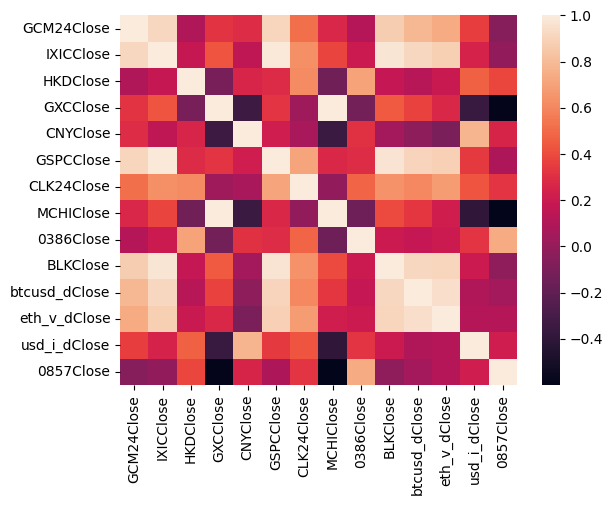

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())

In [8]:
df.corr()['btcusd_dClose'].abs().sort_values(ascending=False).head(10)

btcusd_dClose    1.000000
eth_v_dClose     0.945606
IXICClose        0.916503
BLKClose         0.912576
GSPCClose        0.902721
GCM24Close       0.786737
CLK24Close       0.605982
GXCClose         0.372193
MCHIClose        0.327378
0386Close        0.173504
Name: btcusd_dClose, dtype: float64

## Preprocess data

In [9]:
from siml_pipeline import Pipeline

In [10]:
p = Pipeline()
X_train, X_test, Y_train, Y_test = p.process(df, 'btcusd_dClose')

In [13]:
n_of_features = X_train.shape[-1]
X_test.shape, Y_train.shape, Y_test.shape

((407, 10, 13), (1240, 1), (407, 1))

# Train model

In [14]:
from siml_model import build_model

In [21]:
model = build_model(p.num_days, n_of_features)

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [23]:
epochs = 18
batch = 128

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=epochs,
                    batch_size=batch)

Epoch 1/18
10/10 [==============================] - 6s 186ms/step - loss: 0.9372 - mae: 0.7002 - val_loss: 1.8453 - val_mae: 1.1217
Epoch 2/18
10/10 [==============================] - 1s 86ms/step - loss: 0.6407 - mae: 0.5652 - val_loss: 1.8153 - val_mae: 1.1098
Epoch 3/18
10/10 [==============================] - 1s 122ms/step - loss: 0.3523 - mae: 0.4270 - val_loss: 1.8151 - val_mae: 1.1152
Epoch 4/18
10/10 [==============================] - 1s 72ms/step - loss: 0.2639 - mae: 0.3677 - val_loss: 1.7808 - val_mae: 1.1003
Epoch 5/18
10/10 [==============================] - 1s 124ms/step - loss: 0.2010 - mae: 0.3211 - val_loss: 1.7747 - val_mae: 1.0951
Epoch 6/18
10/10 [==============================] - 1s 77ms/step - loss: 0.1826 - mae: 0.3024 - val_loss: 1.7622 - val_mae: 1.0900
Epoch 7/18
10/10 [==============================] - 1s 137ms/step - loss: 0.1469 - mae: 0.2691 - val_loss: 1.7202 - val_mae: 1.0692
Epoch 8/18
10/10 [==============================] - 1s 142ms/step - loss: 0.150

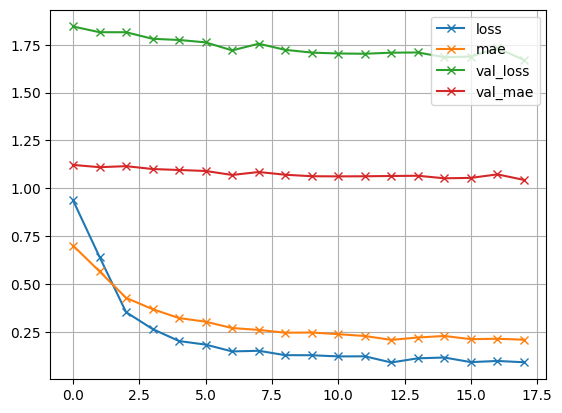

In [25]:
for k,v in history.history.items():
    plt.plot(v, 'x-', label=k)
plt.legend()
plt.grid()